# Problem Statement:

❤️ Heart Disease Prediction using Machine Learning

This project applies various machine learning models to predict the likelihood of heart disease using a well-known open-source dataset of patient medical records.

**Goals of the Project**:
- Explore and preprocess the dataset
- Engineer relevant features to improve predictions
- Train and compare multiple classification models
- Evaluate model performance using key metrics
- Deploy the best model for real-time predictions via Streamlit




Data Dictionary

age: Displays the age of the individual.

sex: Displays the gender of the individual using the following format : 1 = male 0 = female

Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

 Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

Max heart rate achieved : displays the max heart rate achieved by an individual.

Exercise induced angina : 1 = yes 0 = no

ST depression induced by exercise relative to rest: displays the value.

Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart


Heart Disease : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no.

# Import Tools Needed

In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.2 MB/s eta 0:00:00


In [ ]:
!pip install shap

# Import the Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats.mstats import winsorize
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Model Import
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import pickle

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

import pickle
import shap

# Load the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Heart Diseases dataset/heart.csv'

data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data.shape

(918, 12)

In [4]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## 🧹 Data Preprocessing & Exploration

We begin by loading the dataset and performing basic data exploration to understand feature types, distributions, and check for missing or inconsistent values.


# Data Pre-processing

In [7]:
data['Sex'] = data['Sex'].replace({'F':1,'M': 0})
data['ExerciseAngina'] = data['ExerciseAngina'].replace({'N': 0, 'Y': 1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 86.2+ KB


# Feature Engineering

To enhance model performance, we introduced several engineered features:
- Cholesterol-to-Age Ratio
- Max Heart Rate-to-Age Ratio
-One hot encoding for categorical variables like chest pain type, ECG, and ST segment slope

In [8]:
data['Cholesterol_Age_Ratio'] = data['Cholesterol'] / data['Age']
data['MaxHR_Age_Ratio'] = data['MaxHR'] / data['Age']

def categorize_age(age):
    if age <= 40:
        return 'Young'
    elif 40 < age <= 60:
        return 'Middle-aged'
    else:
        return 'Senior'

data['AgeGroup'] = data['Age'].apply(categorize_age)
AgeGroup_order = CategoricalDtype(categories=['Young', 'Middle-aged', 'Senior'], ordered=True)
data['Age_bracket'] = data['AgeGroup'].astype(AgeGroup_order)

# Analysing the distributions of the graph

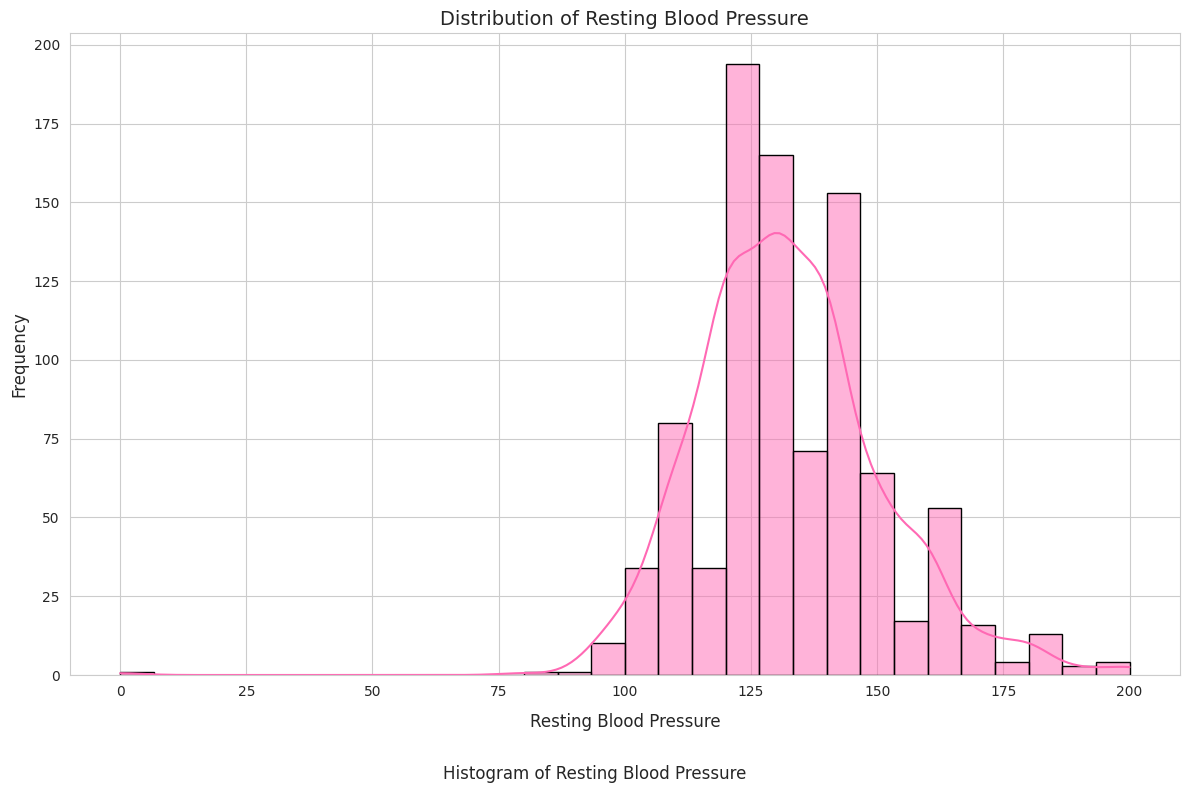

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data['RestingBP'],bins=30, kde=True, edgecolor='black', color='hotpink')

plt.xlabel('Resting Blood Pressure', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Resting Blood Pressure', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

plt.figtext(0.5, 0.02, 'Histogram of Resting Blood Pressure', ha='center', fontsize=12)

plt.show()

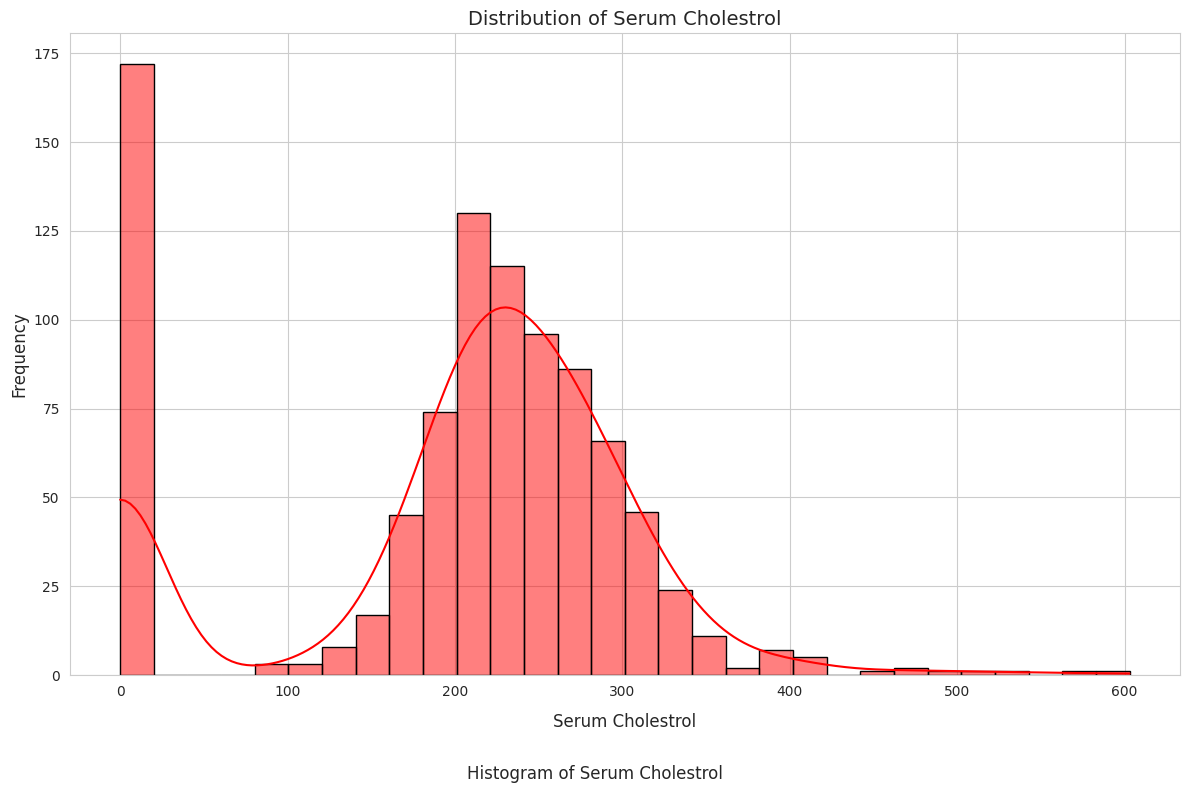

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot (data['Cholesterol'], bins=30, kde=True, edgecolor='black', color='red')

plt.xlabel('Serum Cholestrol', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Serum Cholestrol', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

plt.figtext(0.5, 0.02, 'Histogram of Serum Cholestrol', ha='center', fontsize=12)

plt.show()

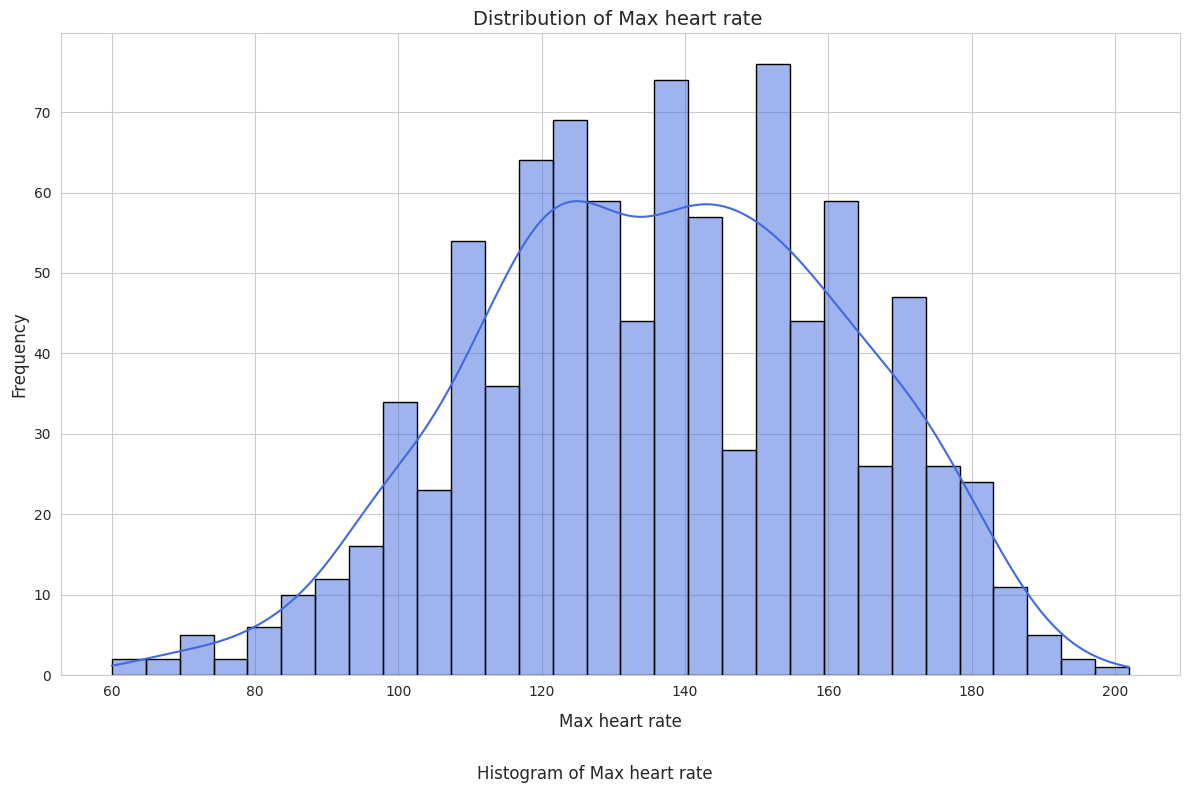

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data['MaxHR'], bins=30, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('Max heart rate', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Max heart rate ', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

plt.figtext(0.5, 0.02, 'Histogram of Max heart rate', ha='center', fontsize=12)

plt.show()

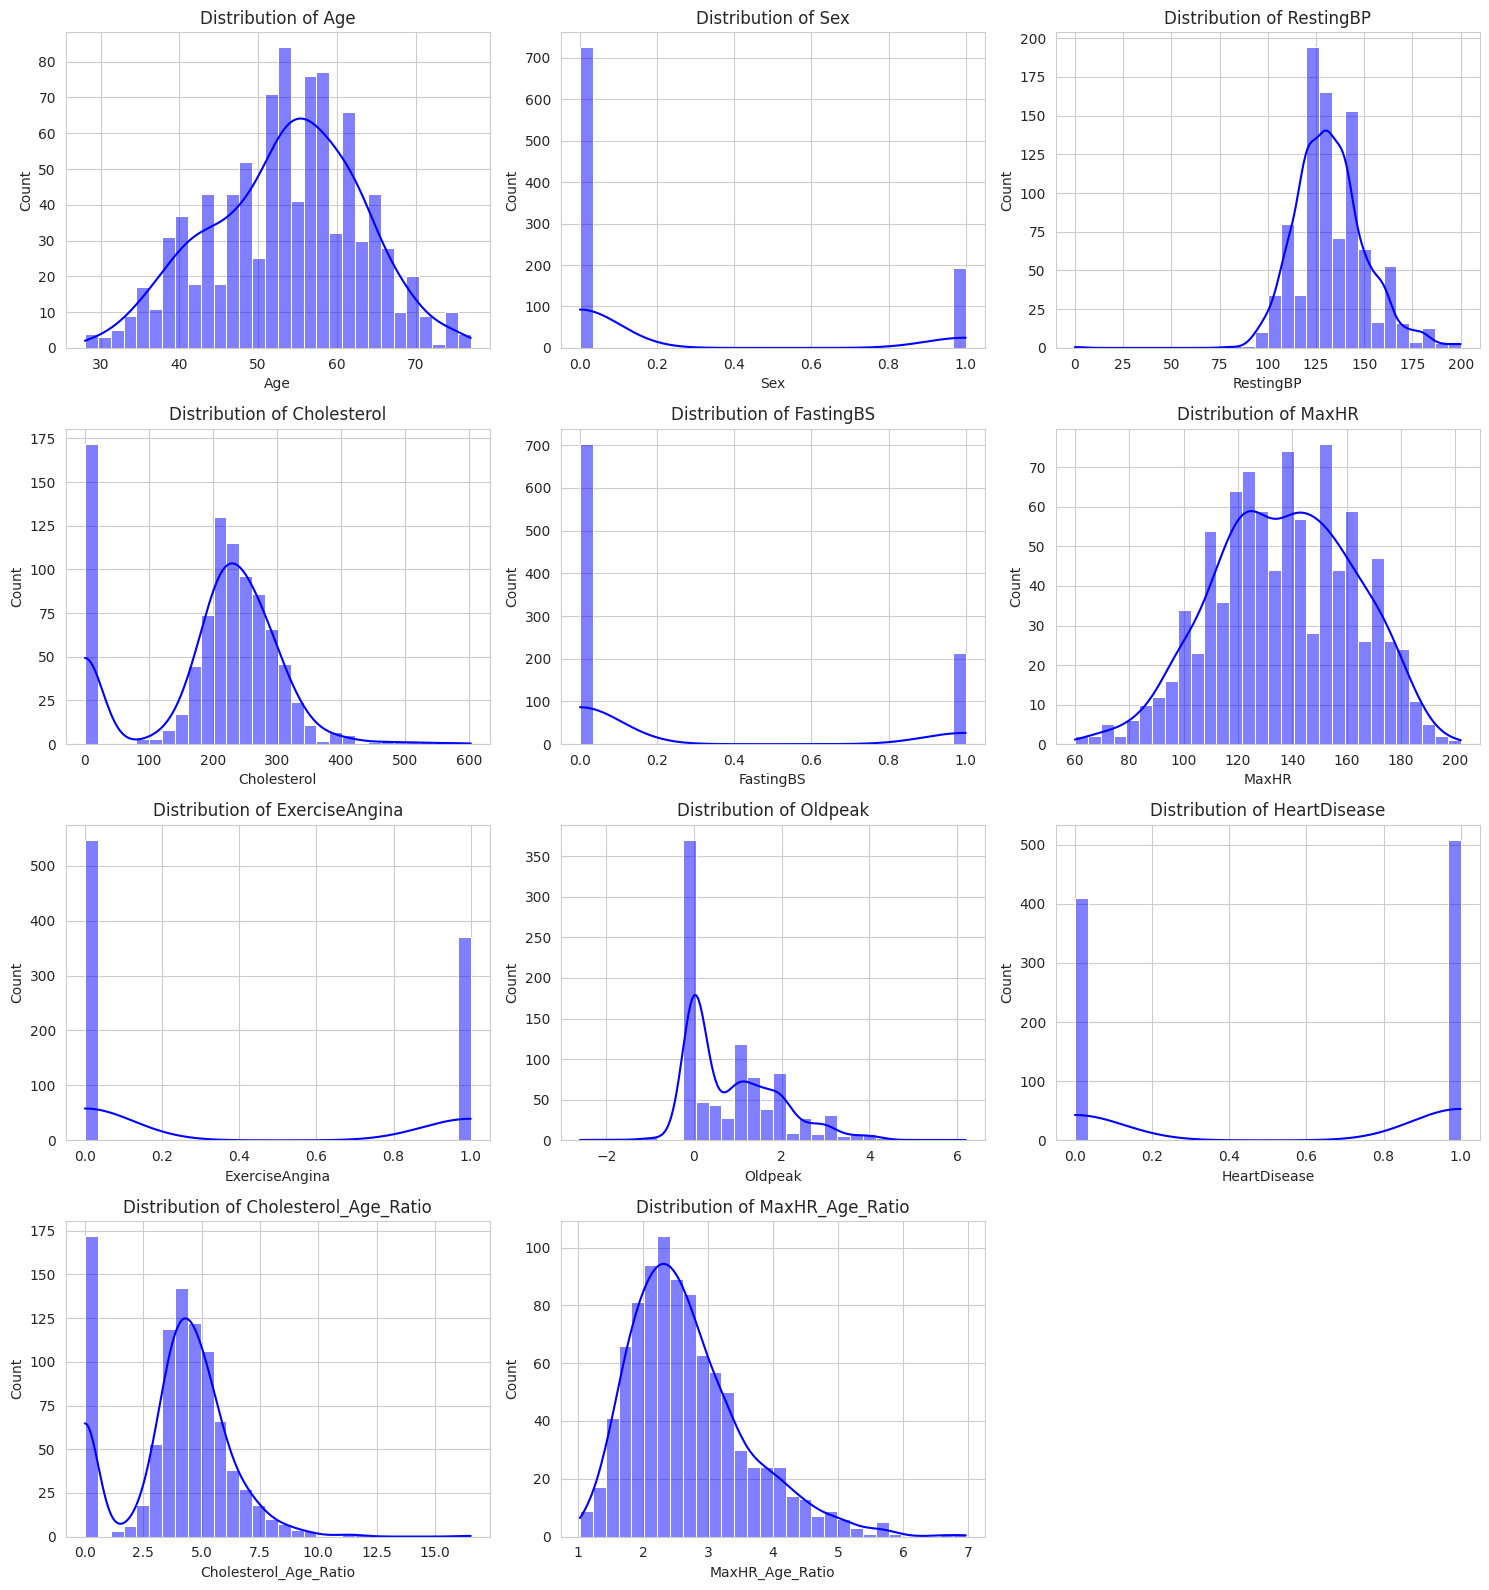

In [12]:
numerical_cols = data.select_dtypes(include=['int64', 'float64','bool']).columns


num_features = len(numerical_cols)
num_rows = int(np.ceil(num_features / 3))

plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Outlier Treatment

In [13]:
data["RestingBP"] = data["RestingBP"].clip(lower=80, upper=180)

# Winsorize
data["Cholesterol"] = winsorize(data["Cholesterol"], limits=[0.01, 0.05])
data["Cholesterol_Age_Ratio"] = winsorize(data["Cholesterol_Age_Ratio"], limits=[0.01, 0.05])
data["MaxHR_Age_Ratio"] = winsorize(data["MaxHR_Age_Ratio"], limits=[0.01, 0.05])

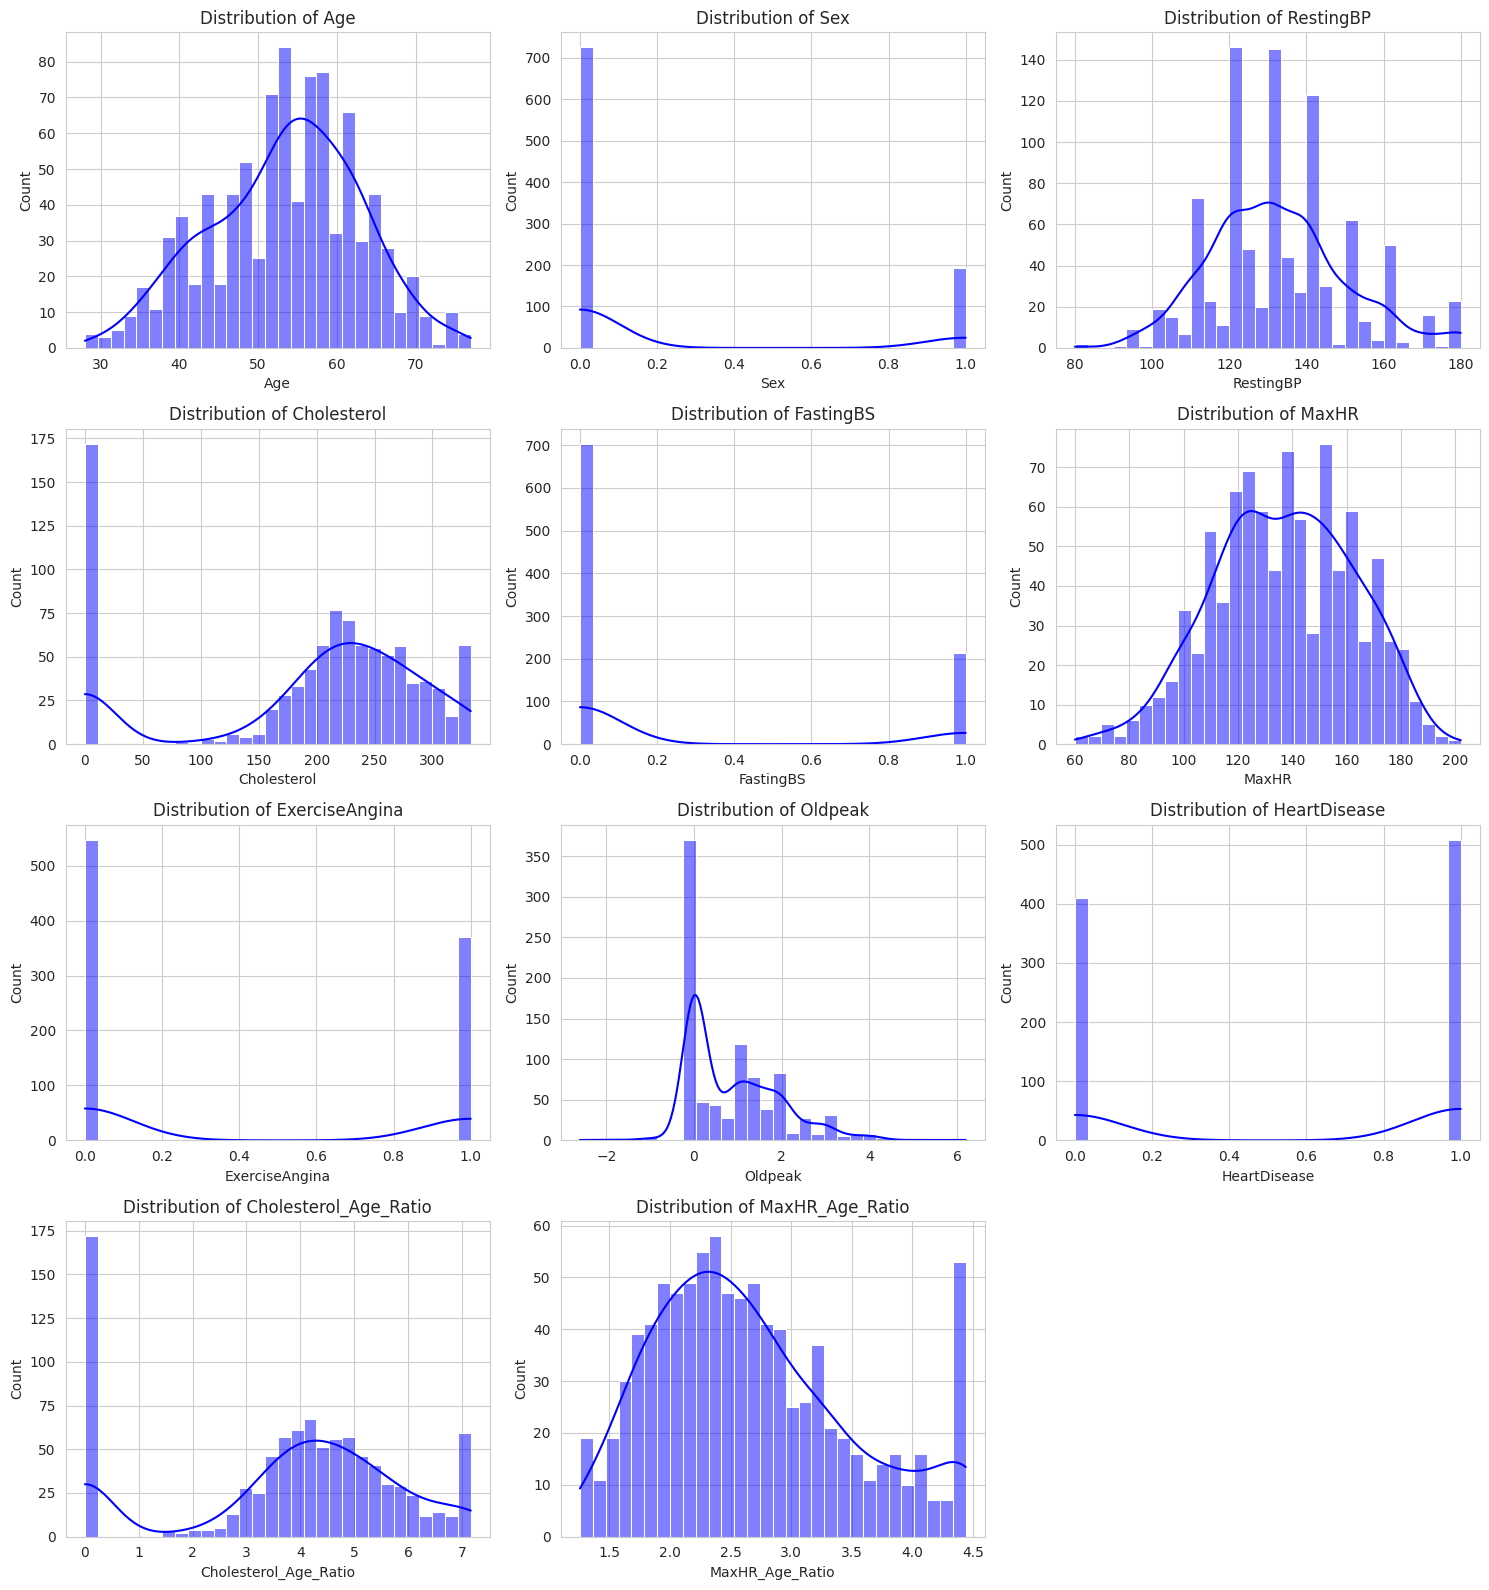

In [14]:
numerical_cols = data.select_dtypes(include=['int64', 'float64','bool']).columns


num_features = len(numerical_cols)
num_rows = int(np.ceil(num_features / 3))

plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# EDA (Exploratory Data Analysis)

**The Target variable is very slightly imbalanced with 1.24:1 as displayed by the above pie chart**

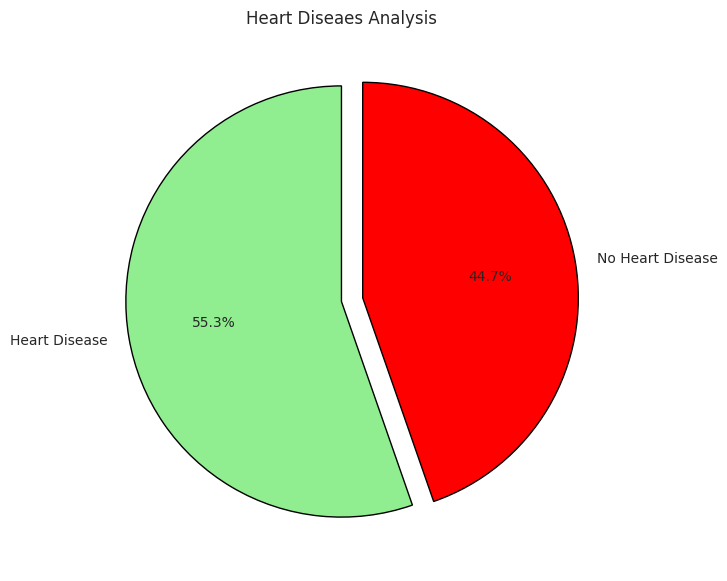

In [15]:
Heart_counts = data['HeartDisease'].value_counts()

labels = ['Heart Disease', 'No Heart Disease']


colors = ['lightgreen','red']

plt.figure(figsize=(7, 7))
plt.pie(Heart_counts, labels=labels, autopct='%1.1f%%', colors=colors, explode=[0, 0.1], startangle=90, wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Heart Diseaes Analysis')

# Show plot
plt.show()

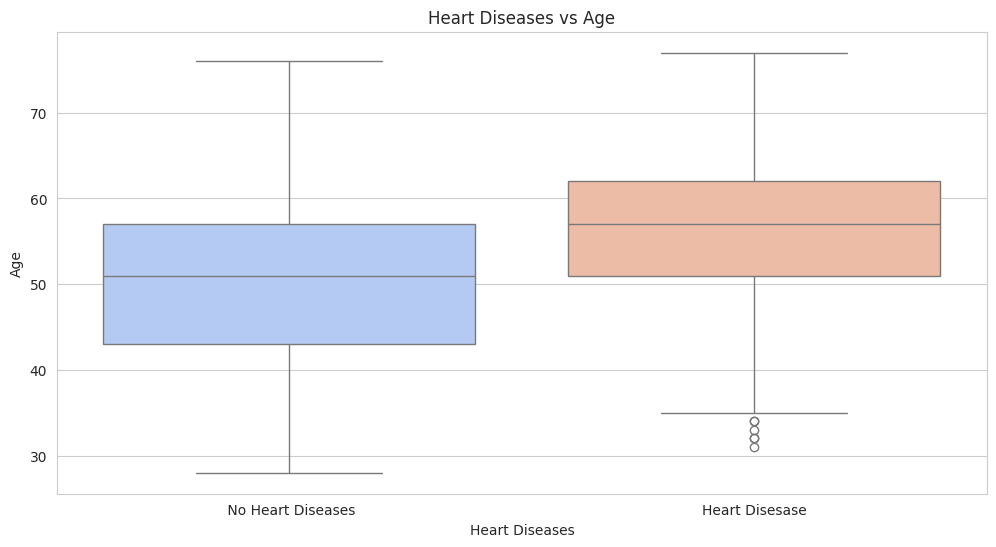

In [16]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='HeartDisease', y='Age', data=data, palette="coolwarm")
plt.xlabel('Heart Diseases')
plt.ylabel('Age')
plt.title('Heart Diseases vs Age')
plt.xticks([1,0],['Heart Disesase', ' No Heart Diseases'])
plt.show()

**The above boxplot represents that people who have heart diseases are generally between age 35-75 and anything below or above are considered outliers.**

In [17]:
# T-Test: Are Heart Diseases significant across age groups or is it only due to random chance?
t_stat, p_value = stats.ttest_ind(
    data[data['HeartDisease'] == 1]['Age'],
    data[data['HeartDisease'] == 0]['Age'],
    equal_var=False
)
print(f"T-Test: Heart Disease vs Age \nT-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

T-Test: Heart Disease vs Age 
T-Statistic: 8.8225, P-Value: 0.0000


**T-Test: Relationship Between Age and Heart Disease**
**To determine whether age is significantly associated with the presence of heart disease, a two-tailed independent samples t-test was conducted. The test compared the mean ages of patients with and without heart disease.**

**T-Statistic = 8.8225**

**P-Value < 0.0001**

**The results show a high t-statistic and a p-value well below the conventional alpha level of 0.05, indicating that the difference in mean age between the two groups is statistically significant. Therefore, we can reject the null hypothesis and conclude that age has a significant association with heart disease, and the observed difference is not due to random chance.**

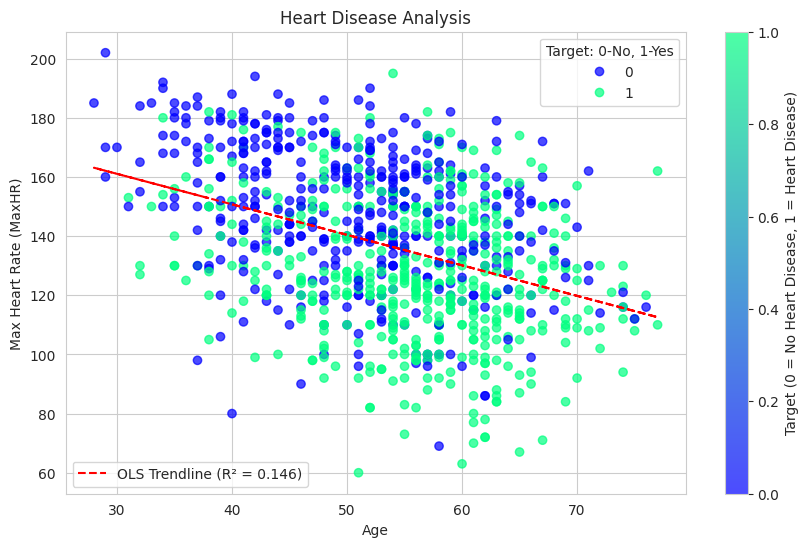

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
scatter = ax.scatter(data["Age"],
                      data["MaxHR"],
                      c=data['HeartDisease'],
                      cmap='winter',
                      alpha=0.7)

# Calculate OLS regression
slope, intercept, r_value, p_value, std_err = linregress(data["Age"], data["MaxHR"])
line = slope * data["Age"] + intercept

# Plot OLS line
ax.plot(data["Age"], line, color='red', linestyle='--',
        label=f'OLS Trendline (R² = {r_value**2:.3f})')

# Title and labels
ax.set(title="Heart Disease Analysis",
       xlabel='Age',
       ylabel="Max Heart Rate (MaxHR)")

# Add legend for OLS Trendline
ols_legend = ax.legend(loc='lower left')

# Add legend for scatterplot colors
scatter_legend = ax.legend(*scatter.legend_elements(), title='Target: 0-No, 1-Yes', loc='upper right')

# Re-add OLS legend to the plot (so both legends display)
ax.add_artist(ols_legend)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Target (0 = No Heart Disease, 1 = Heart Disease)")

plt.show()

**The scatter plot above illustrates the relationship between Age and Maximum Heart Rate (MaxHR), with data points color-coded by heart disease status (0 = No, 1 = Yes). A clear negative correlation is observed—as age increases, the maximum heart rate tends to decrease. This trend is supported by the red dashed OLS regression line, which slopes downward and has an R² value of 0.146, indicating a moderate but meaningful relationship. While individual variability exists, the overall pattern aligns with medical knowledge that an individual’s cardiovascular capacity tends to decline with age. This insight helps reinforce the importance of age and heart rate as relevant features in predicting heart disease risk.**

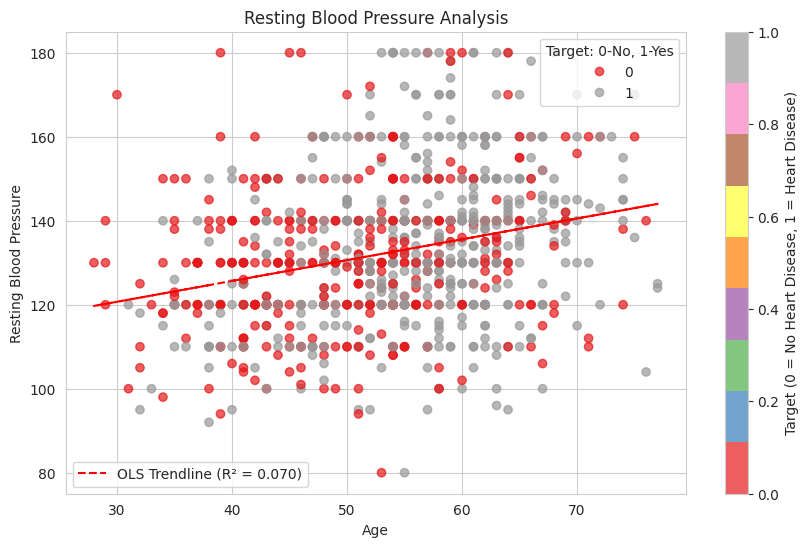

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
scatter = ax.scatter(data["Age"],
                      data["RestingBP"],
                      c=data['HeartDisease'],
                      cmap='Set1',
                      alpha=0.7)

# Calculate OLS regression
slope, intercept, r_value, p_value, std_err = linregress(data["Age"], data["RestingBP"])
line = slope * data["Age"] + intercept

# Plot OLS line
ax.plot(data["Age"], line, color='red', linestyle='--',
        label=f'OLS Trendline (R² = {r_value**2:.3f})')

# Title and labels
ax.set(title="Resting Blood Pressure Analysis",
       xlabel='Age',
       ylabel="Resting Blood Pressure")

# Add legend for OLS Trendline
ols_legend = ax.legend(loc='lower left')

# Add legend for scatterplot colors
scatter_legend = ax.legend(*scatter.legend_elements(), title='Target: 0-No, 1-Yes', loc='upper right')

# Re-add OLS legend to the plot (so both legends display)
ax.add_artist(ols_legend)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Target (0 = No Heart Disease, 1 = Heart Disease)")

plt.show()

**The scatter plot above analyzes the relationship between Age and Resting Blood Pressure, with color-coded points based on heart disease status (0 = No, 1 = Yes). The OLS regression line indicates a slight positive correlation—as age increases, resting blood pressure tends to rise. This is reflected in the R² value of 0.075, suggesting a weak linear relationship, though the upward trend is still noticeable. The spread of points shows considerable variability in blood pressure across all age groups, but the general increase with age aligns with common medical knowledge. While the correlation is not strong, this trend supports the relevance of both age and resting blood pressure in heart disease analysis.**

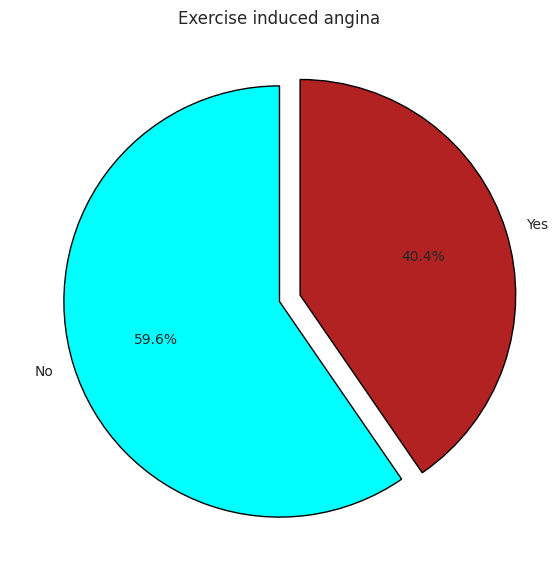

In [20]:
angina_count = data['ExerciseAngina'].value_counts()

labels = ["No", "Yes"]


colors = ['cyan','firebrick']

plt.figure(figsize=(7, 7))
plt.pie(angina_count, labels=labels, autopct='%1.1f%%', colors=colors, explode=[0, 0.1], startangle=90, wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Exercise induced angina')

# Show plot
plt.show()

**The pie chart visualizes the distribution of exercise-induced angina among individuals in the dataset. According to the chart:**

**59.6% of individuals do not experience angina as a result of exercise.**

**40.4% of individuals do experience angina during or after physical exertion.**

**This indicates that exercise-induced chest pain is present in a significant portion (over 40%) of the dataset, suggesting its potential relevance in heart disease diagnosis. Given that angina reflects reduced blood flow to the heart muscle, it may serve as a strong clinical indicator in risk stratification.**

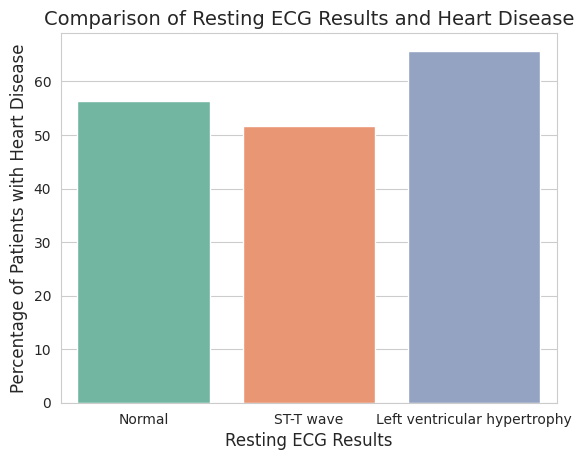

In [21]:
count_ECG = data.groupby("RestingECG")["HeartDisease"].mean() * 100

count_ECG_df = count_ECG.reset_index()
count_ECG_df.columns = ["RestingECG", "HeartDisease Percentage"]

ax = sns.barplot(x="RestingECG", y="HeartDisease Percentage", data=count_ECG_df, palette="Set2")

plt.xlabel("Resting ECG Results", fontsize=12)
plt.ylabel("Percentage of Patients with Heart Disease", fontsize=12)
plt.title("Comparison of Resting ECG Results and Heart Disease", fontsize=14)


plt.xticks([0,1,2], ['Normal', 'ST-T wave', 'Left ventricular hypertrophy'])

plt.show()

**The above bar chart displays the percentage of patients diagnosed with heart disease across three categories of resting electrocardiogram (ECG) results:**

**Normal**

**ST-T Wave Abnormality**

**Left Ventricular Hypertrophy**

**Key Observations:**

**Patients with left ventricular hypertrophy have the highest association with heart disease, with over 65% affected.**

**Individuals with normal ECG results also show a significant heart disease presence (~56%), which may indicate that ECG alone doesn't guarantee the absence of cardiovascular issues.**

**Those with ST-T wave abnormalities show the lowest percentage (~52%), though the difference is modest compared to the other categories.**

**Conclusion:**

**While all ECG result categories are associated with notable heart disease percentages, left ventricular hypertrophy stands out as the most indicative of heart disease in this dataset. This supports clinical understanding, as left ventricular hypertrophy is often a sign of long-term cardiac strain or damage.**

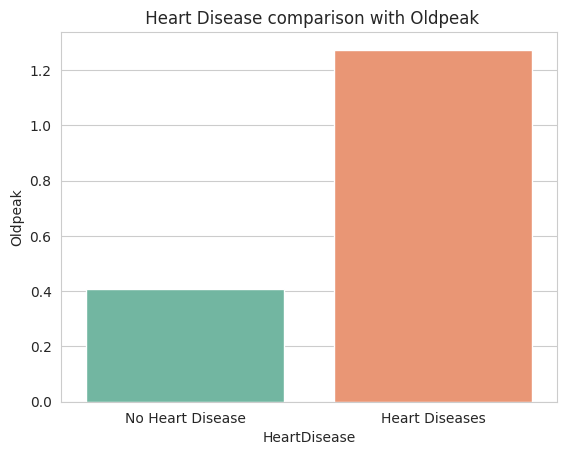

In [22]:
old_peak = data.groupby("HeartDisease")["Oldpeak"].mean()
old_peak_df = old_peak.reset_index()
old_peak_df.columns = ["HeartDisease", "Oldpeak"]

ax = sns.barplot(x="HeartDisease", y="Oldpeak", data=old_peak_df, palette="Set2")
plt.title(" Heart Disease comparison with Oldpeak")
plt.xticks([0,1],['No Heart Disease','Heart Diseases'])
plt.show()

**0.0	No ST depression	✅ Normal heart function**

**1.0 - 2.0	Mild ST depression	⚠️ Potential heart stress**

**2.0 or more	Significant ST depression	🚨 High risk of heart disease**

In [23]:
data['Age_bracket'].value_counts()

,count
Age_bracket,
Middle-aged,604
Senior,221
Young,93


In [24]:
AgeGroup_order = CategoricalDtype(categories=['Young', 'Middle-aged', 'Senior'], ordered=True)

# Apply to Age_bracket
data['Age_bracket'] = data['Age_bracket'].astype(AgeGroup_order)
data['Age_bracket'] = data['Age_bracket'].cat.codes

In [25]:
data['Age_bracket'].value_counts()

,count
Age_bracket,
1,604
2,221
0,93


In [26]:
cols_to_drop = ['Age', 'Cholesterol', 'MaxHR','AgeGroup']
data.drop(columns=cols_to_drop, inplace=True)

# Export the cleaned features into a CSV

In [27]:
data.to_csv("cleaned_data.csv", index=False)

# Modeling

## Model Training & Comparison

We trained multiple classification models including:
- Logistic Regression
- Random Forest
- XGBoost
- LightGBM
- KNN
- Gradient Boosting
- CatBoost


Each model was evaluated using accuracy, precision, recall, F1-score, and ROC-AUC score to identify the best-performing approach.


# Model Building

In [28]:
X = data.drop('HeartDisease',axis=1)

y = data['HeartDisease']

In [29]:
np.random.seed(42)

# split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## Manual Feature Reduction (After Dropping Redundant Features):


Instead of using VIF (Variance Inflation Factor), which automatically removed alot of important features that adds value to the prediction, I opted for manual feature selection based on the above correlation logic and domain relevance.

The second heatmap reflects this:

The updated feature set retains a balance between low multicollinearity and high predictive potential.

The new heatmap shows no signs of multicollinarity that exhibit dangerously high correlation (≥ 0.85), making the feature space more stable for modeling.

# Data transformation

In [30]:
onehot_features = ['ChestPainType', 'RestingECG', 'ST_Slope']

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), onehot_features)
    ],
    remainder='passthrough' )

X_train_encoded_array = preprocessor.fit_transform(X_train)
X_test_encoded_array = preprocessor.transform(X_test)

In [31]:
ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(onehot_features)
remainder_features = [col for col in X_train.columns if col not in onehot_features]
final_feature_names = list(ohe_feature_names) + remainder_features

X_train_encoded = pd.DataFrame(X_train_encoded_array, columns=final_feature_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded_array, columns=final_feature_names, index=X_test.index)

In [32]:
X_train_encoded

,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,Sex,RestingBP,FastingBS,ExerciseAngina,Oldpeak,Cholesterol_Age_Ratio,MaxHR_Age_Ratio,Age_bracket
485,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,139.0,1.0,1.0,1.2,3.444444,2.031746,2.0
486,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,110.0,1.0,0.0,0.4,3.890909,3.272727,1.0
117,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,130.0,1.0,1.0,1.5,5.728814,2.203390,1.0
361,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,160.0,0.0,1.0,0.0,0.000000,2.638298,1.0
296,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,145.0,1.0,1.0,0.7,0.000000,2.780000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,135.0,0.0,0.0,2.0,3.137255,2.941176,1.0
201,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,120.0,0.0,0.0,0.0,5.000000,3.260870,1.0
462,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,122.0,0.0,1.0,1.3,3.949153,1.983051,1.0
252,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,125.0,0.0,1.0,0.0,4.786885,1.885246,2.0


# Correlation Matrix

# Initial Heatmap and check for multicollinarity:

The first correlation heatmap presents the pairwise relationships between all numerical and encoded features. A few key observations:

Several high correlations between engineered features were evident:

Cholesterol and Cholesterol_Age_Ratio (0.94)

MaxHR and MaxHR_Age_Ratio (0.82)

Age and Age_bracket (0.85)

These high correlations indicate multicollinearity, which can adversely impact model performance, especially for linear models.

Impact on Target (HeartDisease):
Positive correlations:

Oldpeak (0.40), ExerciseAngina (0.49), ST_Slope_Flat (0.55)

Negative correlations:

MaxHR_Age_Ratio (-0.40), ST_Slope_Up (-0.45)

These features are important and should be retained.

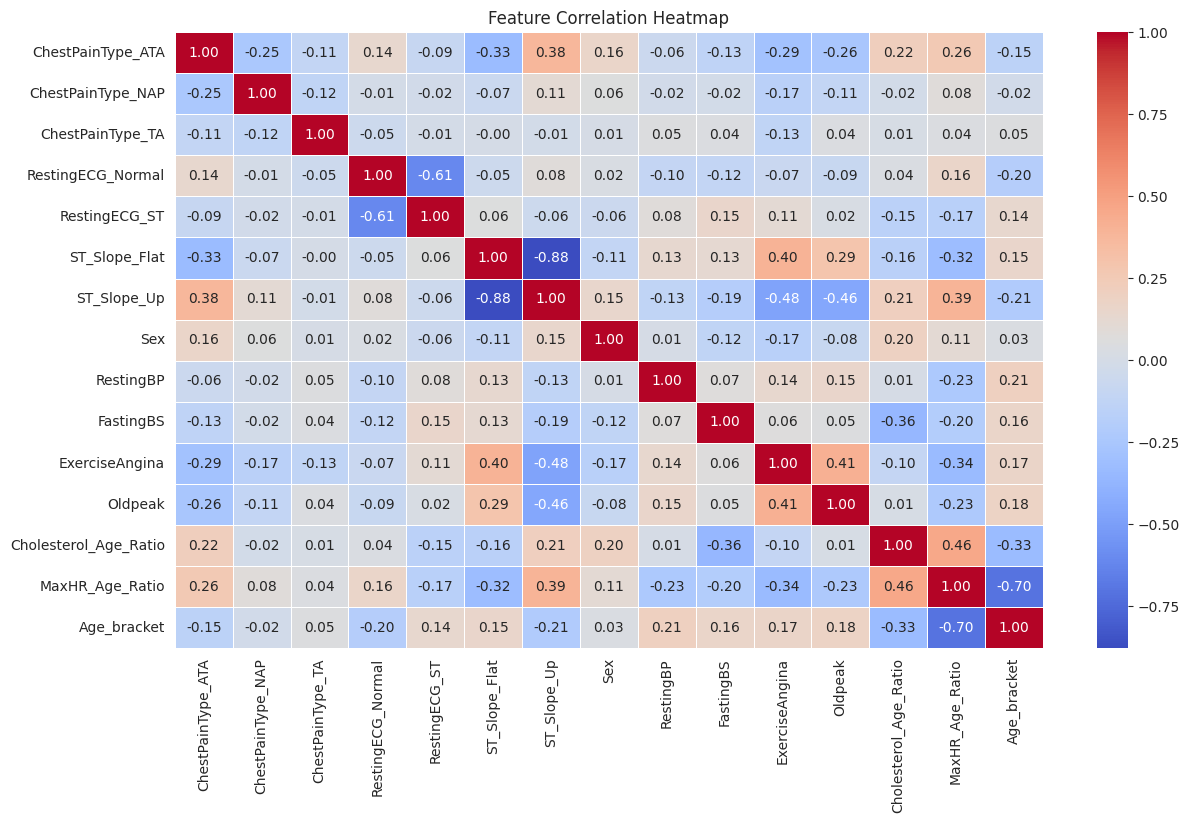

In [33]:
corr_matrix = X_train_encoded.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

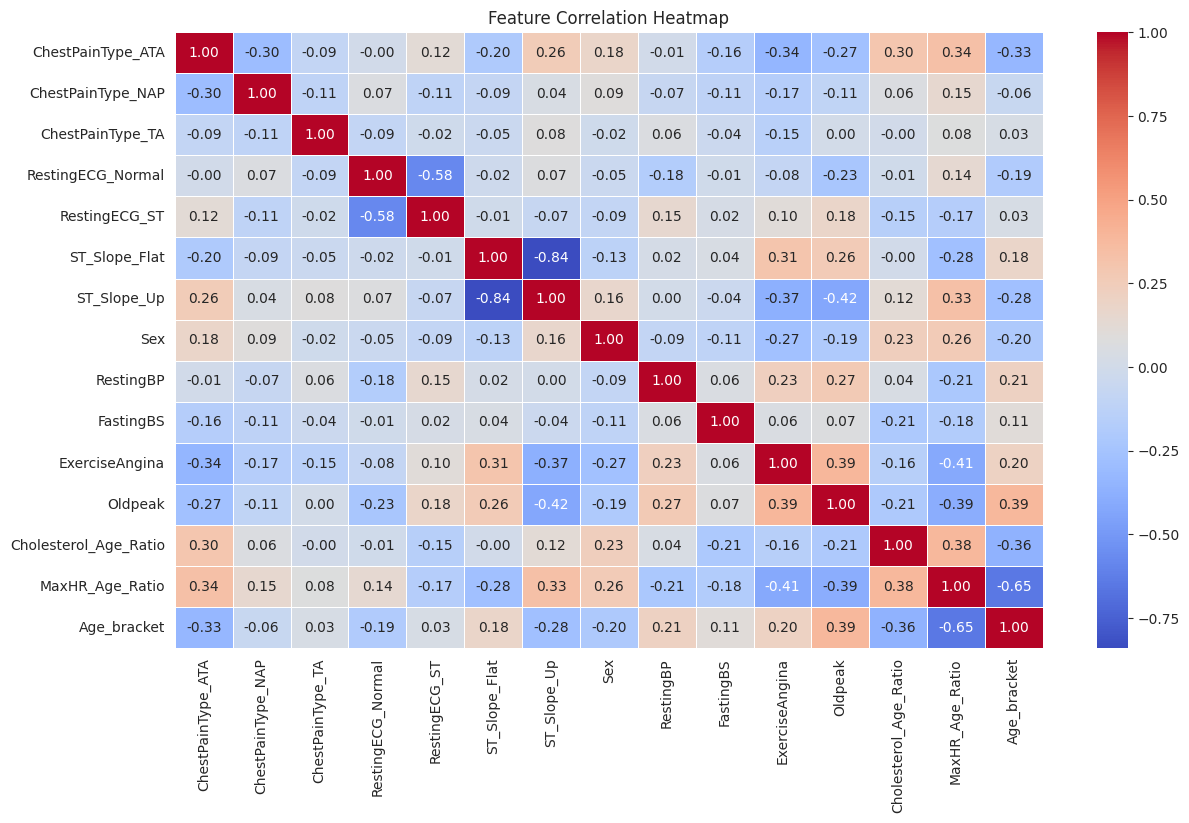

In [34]:
corr_matrix = X_test_encoded.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Handling Class Imbalance

During the EDA phase, we observed that the target variable was slightly imbalanced, with 55.3% of samples representing patients with heart disease and 44.7% without. While this level of imbalance typically does not require special handling, applying techniques like SMOTE (Synthetic Minority Oversampling Technique) can help improve model performance by ensuring better class representation. Unlike basic oversampling, which duplicates existing samples and can lead to overfitting, SMOTE generates synthetic samples for the minority class by interpolating between existing examples. This introduces more variability and helps the model learn a more generalizable decision boundary."

In [35]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

Feature scaling was applied to standardize the range of values across features, allowing machine learning models to train more efficiently and reducing the risk of overfitting.

The data will have mean = 0 and standard deviation = 1

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test_encoded)

In [37]:
X_train_scaled

array([[ 2.04084348, -0.54894351, -0.25067116, ..., -0.25922813,
        -0.79729741,  1.52618852],
       [ 2.04084348, -0.54894351, -0.25067116, ..., -0.04370286,
         0.72299488, -0.24175249],
       [-0.50637615, -0.54894351, -0.25067116, ...,  0.84352274,
        -0.58702127, -0.24175249],
       ...,
       [ 0.66702034, -0.54894351, -0.25067116, ..., -0.30695816,
        -0.29193273,  0.57266325],
       [-0.50637615,  1.88111349, -0.25067116, ..., -0.56767922,
         0.44922305, -0.24175249],
       [-0.50637615,  1.62860943, -0.25067116, ...,  0.41452682,
         0.44314405, -0.24175249]])

In [38]:
X_test_scaled

array([[-0.50637615, -0.54894351, -0.25067116, ..., -1.92199099,
        -0.27691627, -0.24175249],
       [-0.50637615,  1.88111349, -0.25067116, ..., -0.05762507,
         0.36776219, -0.24175249],
       [-0.50637615, -0.54894351, -0.25067116, ...,  0.15378071,
        -0.40741315, -0.24175249],
       ...,
       [-0.50637615, -0.54894351,  4.09245206, ..., -1.92199099,
         0.33888116, -0.24175249],
       [-0.50637615, -0.54894351, -0.25067116, ...,  0.03350541,
        -0.33785394, -0.24175249],
       [-0.50637615,  1.88111349, -0.25067116, ..., -1.92199099,
        -0.10544347, -0.24175249]])

## SMOTE baseline Models


To establish baseline performance before hyperparameter tuning, I trained a variety of machine learning models, ranging from simple linear classifiers to advanced ensemble techniques

The models selected include Logistic Regression, K-Nearest Neighbors, Random Forest, Gradient Boosting, AdaBoost, LightGBM, and CatBoost."

In [39]:
models = {
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(verbose=0)
}

I defined a custom fit_and_score function to train multiple models and evaluate their performance using various metrics. Each model is trained on the SMOTE-balanced training set and tested on the scaled test set. Evaluation metrics include Accuracy, Precision, Recall, F1 Score, ROC AUC (if available), and a detailed classification report. This helps us compare models effectively and choose the most promising one for tuning.

In [40]:
def evaluate_baseline_models(models, X_train_scaled, y_train, X_test_scaled, y_test):

    results = []
    trained_models = {}

    for name, model in models.items():
        print(f"\nTraining: {name}")
        model.fit(X_train_scaled, y_train)
        trained_models[name] = model

        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test, average='weighted')
        recall = recall_score(y_test, y_pred_test, average='weighted')
        f1 = f1_score(y_test, y_pred_test, average='weighted')

        try:
          y_proba = model.predict_proba(X_test_scaled)
          roc_auc = roc_auc_score(y_test, y_proba[:, 1])
        except:
          oc_auc = 'N/A'

        print(f"Test Accuracy: {test_acc:.4f}")
        print("Classification Report:\n", classification_report(y_test, y_pred_test))

        results.append({
            'Model': name,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1,
            'ROC AUC': roc_auc
        })

    results_df = pd.DataFrame(results)
    return results_df, trained_models

In [41]:
baseline_results_df, baseline_models = evaluate_baseline_models(
    models,
    X_train_scaled,
    y_train_smote,
    X_test_scaled,
    y_test
)


Training: LogisticRegression
Test Accuracy: 0.8967
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184


Training: KNN
Test Accuracy: 0.8804
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


Training: Random Forest
Test Accuracy: 0.8859
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      

# Model Comparison

To assess SMOTE baseline model performance, we trained a variety of machine learning models including both linear and ensemble methods. These models were evaluated using multiple metrics such as Accuracy, Precision, Recall, F1 Score, and ROC AUC on the test set.

This comprehensive evaluation provided valuable insights into each model’s predictive power and helped identify the most promising candidates for hyperparameter tuning.

In [42]:
print("\nModel Comparison:")
display(baseline_results_df)


Model Comparison:


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-score,ROC AUC
0,LogisticRegression,0.857143,0.896739,0.896796,0.896739,0.896525,0.930775
1,KNN,0.892857,0.880435,0.880330,0.880435,0.880277,0.946138
2,Random Forest,1.000000,0.885870,0.887205,0.885870,0.885218,0.937410
3,Gradient Boosting,0.948276,0.875000,0.874895,0.875000,0.874921,0.928144
4,AdaBoost,0.871921,0.880435,0.880435,0.880435,0.880435,0.917504
5,LightGBM,1.000000,0.858696,0.859203,0.858696,0.858847,0.936753
6,CatBoost,0.979064,0.880435,0.880593,0.880435,0.880090,0.942970


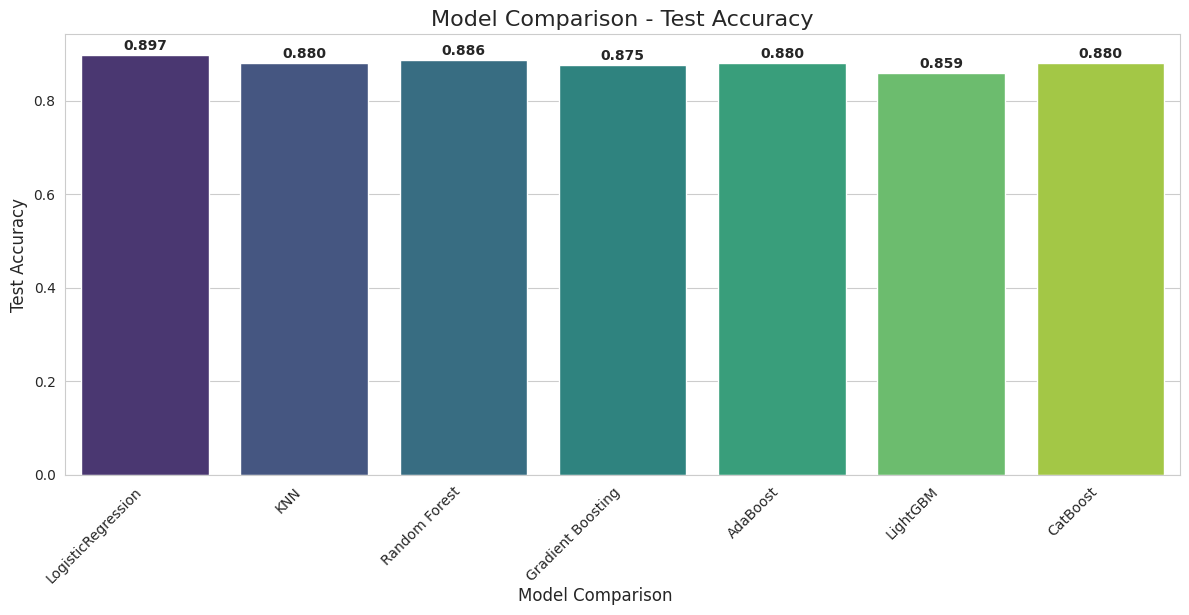

In [43]:
plot_data = baseline_results_df.reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Test Accuracy', data=plot_data, palette='viridis', dodge=False)

plt.title('Model Comparison - Test Accuracy', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(plot_data['Test Accuracy']):
    ax.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, -0.01, 'Model Comparison', ha='center', fontsize=12)
plt.show()

# Defining the Hyperparameters

To further improve performance, I applied GridSearchCV to fine-tune hyperparameters for each model. This exhaustive search tested multiple combinations using 5-fold cross-validation on the training data, optimizing for accuracy.

The tuning process covered a wide range of hyperparameters — from learning rates, tree depths, and estimators in boosting models to neighbors and distance metrics in KNN.

Once the best hyperparameters were found, each optimized model was retrained and evaluated on the test set.

In [44]:
tuned_models = {
    "Logistic Regression": {
        'model': LogisticRegression(),
        'params': {
            'fit_intercept': [True, False],
            'solver': ['lbfgs', 'liblinear']
        }
    },

    "CatBoost": {
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'iterations': [100, 300, 500],
            'learning_rate': [0.01, 0.05, 0.1],
            'depth': [3, 4, 5],
            'l2_leaf_reg': [5, 10],
            'boosting_type': ['Ordered', 'Plain']
        }
    },

    "LightGBM": {
        'model': LGBMClassifier(verbose=-1),
        'params': {
            'n_estimators': [100, 300, 500],
            'learning_rate': [0.01, 0.05, 0.1],
            'num_leaves': [10, 20, 30],
            'max_depth': [3, 6, 9],
            'boosting_type': ['gbdt', 'dart']
        }
    },

    "KNN": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 10, 15],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski'],
            'p': [1, 2]
        }
    },

    "Random Forest": {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 150, 300],
            'max_depth': [6, 10, 15],
            'min_samples_split': [5, 10],
            'min_samples_leaf': [2, 4],
            'bootstrap': [True, False]
        }
    },

    "Gradient Boosting": {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 300, 500],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'min_samples_split': [5, 10],
            'subsample': [0.7, 0.9]
        }
    },

    "AdaBoost": {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [100, 200, 400],
            'learning_rate': [0.01, 0.05, 0.1],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    }
}


# Hyperparameter Tuning with Grid Search


In [45]:
def fit_and_evaluate_grid_models(tuned_models, X_train_scaled, y_train, X_test_scaled, y_test):
    results = []
    trained_models = {}

    for name, model_info in tuned_models.items():
        print(f"\nTuning and Training with GridSearch: {name}")

        model = model_info['model']
        param_grid = model_info['params']

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=5,
            scoring='f1_macro',
            n_jobs=-1
        )

        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        trained_models[name] = best_model

        y_train_pred = best_model.predict(X_train_scaled)
        y_test_pred = best_model.predict(X_test_scaled)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average='weighted')
        recall = recall_score(y_test, y_test_pred, average='weighted')
        f1 = f1_score(y_test, y_test_pred, average='weighted')

        try:
            y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]
            roc_auc = roc_auc_score(y_test, y_test_proba)
        except:
            roc_auc = "N/A"

        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"{name} - Test Accuracy: {test_acc:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc}")
        print("Classification Report:\n", classification_report(y_test, y_test_pred))

        results.append({
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "Precision": precision,
            "Recall": recall,
            "F1-score": f1,
            "ROC AUC": roc_auc
        })

    results_df = pd.DataFrame(results).set_index("Model").round(4)
    return results_df, trained_models

## Evaluation Metrics

We evaluate the model using:
- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC

These metrics give insight into the model's effectiveness at distinguishing between patients with and without heart disease.


In [46]:
tuned_results_df, trained_models = fit_and_evaluate_grid_models(
    tuned_models,
    X_train_scaled,
    y_train_smote,
    X_test_scaled,
    y_test
)


Tuning and Training with GridSearch: Logistic Regression
Best Parameters: {'fit_intercept': False, 'solver': 'lbfgs'}
Logistic Regression - Test Accuracy: 0.8913, F1: 0.8908, ROC AUC: 0.9302965088474415
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87        82
           1       0.88      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


Tuning and Training with GridSearch: CatBoost
Best Parameters: {'boosting_type': 'Plain', 'depth': 5, 'iterations': 300, 'l2_leaf_reg': 10, 'learning_rate': 0.05}
CatBoost - Test Accuracy: 0.8696, F1: 0.8694, ROC AUC: 0.9371114299378288
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        82
           1       0.88      0.89      0.88       102

    accuracy       

In [47]:
print("\nTuned Model Comparison:")
display(tuned_results_df)


Tuned Model Comparison:


,Train Accuracy,Test Accuracy,Precision,Recall,F1-score,ROC AUC
Model,,,,,,
Logistic Regression,0.8584,0.8913,0.8922,0.8913,0.8908,0.9303
CatBoost,0.9643,0.8696,0.8694,0.8696,0.8694,0.9371
LightGBM,0.9310,0.8967,0.8968,0.8967,0.8965,0.9414
KNN,1.0000,0.8913,0.8912,0.8913,0.8912,0.9486
Random Forest,0.9421,0.8913,0.8933,0.8913,0.8906,0.9382
Gradient Boosting,0.9039,0.8750,0.8750,0.8750,0.8747,0.9351
AdaBoost,0.8793,0.8859,0.8861,0.8859,0.8859,0.9223


LightGBM achieved the highest test accuracy (0.8967) and the best ROC AUC score (0.9414), indicating excellent performance and generalization.

CatBoost and Logistic Regression also maintained strong scores across all metrics, making them robust alternatives.

Models like KNN, despite achieving perfect training accuracy, failed to generalize and remained overfit.

This tuning step not only improved metrics but also validated the initial model selection based on their baseline performances.

## Final Model: LightGBM

LightGBM was selected as the final model due to its:
- Strong generalization on unseen data
- Excellent handling of imbalanced classes
- Fast training time and interpretability

Below is the confusion matrix and classification report for the selected model.


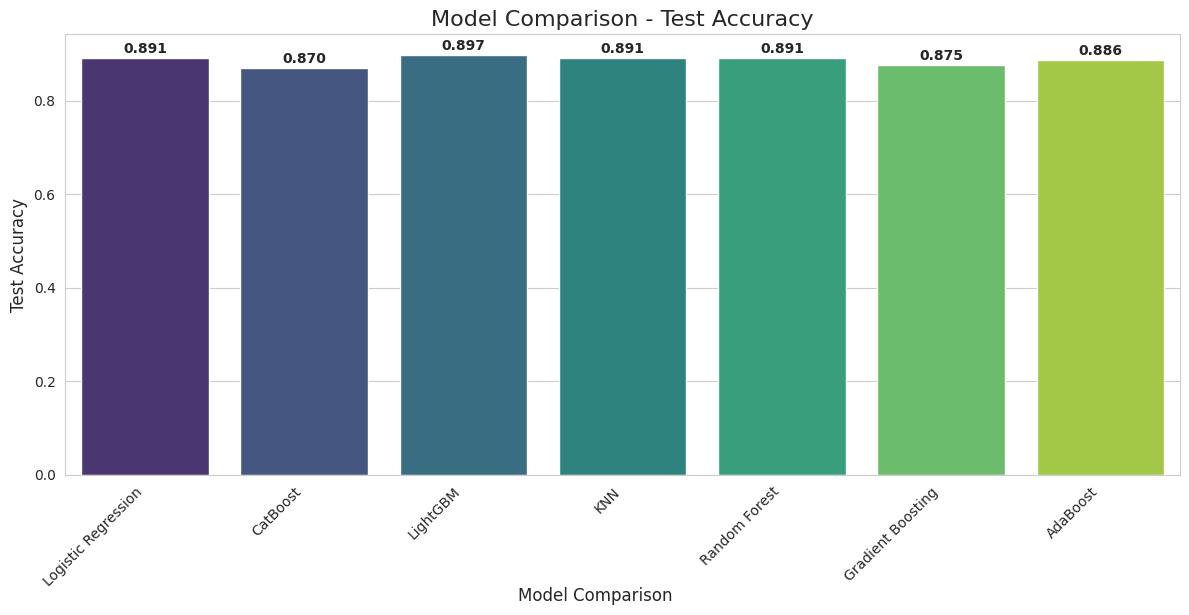

In [48]:
plot_data_tuned = tuned_results_df.reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Test Accuracy', data=plot_data_tuned, palette='viridis', dodge=False)

plt.title('Model Comparison - Test Accuracy', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(plot_data_tuned['Test Accuracy']):
    ax.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, -0.01, 'Model Comparison', ha='center', fontsize=12)
plt.show()

In [49]:
LightGBM = trained_models.get("LightGBM")
best_model = trained_models["LightGBM"]

## Feature Importance Analysis

Understanding which features most strongly influence predictions helps with model interpretability. The plot below shows the top features ranked by importance in the LightGBM model.


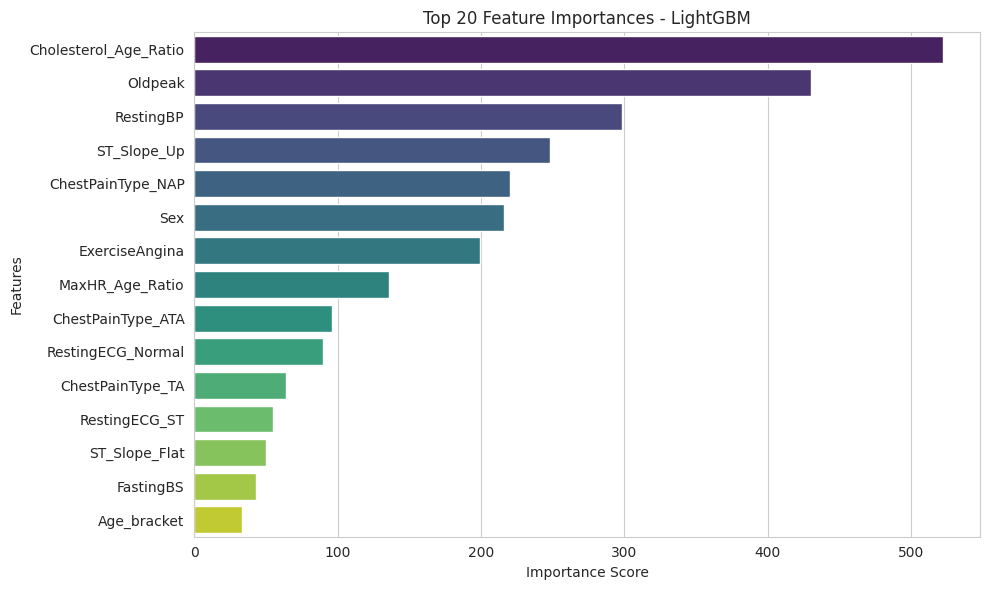

In [50]:
model_name = "LightGBM"
model = trained_models[model_name]

feature_names = final_feature_names

if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=importances[indices][:20],
        y=np.array(feature_names)[indices][:20],
        palette='viridis'
    )
    plt.title(f"Top 20 Feature Importances - {model_name}")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

elif hasattr(model, 'coef_'):
    coefs = model.coef_
    if coefs.ndim > 1:
        coefs = np.mean(coefs, axis=0)
    indices = np.argsort(np.abs(coefs))[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=coefs[indices][:20],
        y=np.array(feature_names)[indices][:20],
        palette='coolwarm'
    )
    plt.title(f"Top 20 Coefficients - {model_name}")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

else:
    print(f"⚠️ {model_name} does not support feature importance or coefficients.")

Feature Importance (LightGBMClassifier):

The feature importance plot illustrates the top 15 features ranked by their contribution to the LightGBM model's predictions. The model identified Cholesterol_Age_Ratio, Oldpeak and RestingBP as the most influential predictors of heart disease. These features likely capture meaningful age-adjusted physiological patterns and stress test indicators.


Other important features include ST_slope_up and Chestpain_NAP and sex of which are medically relevant markers associated with cardiac risk. Lower-ranking features such as ChestPainType_TA, FastingBS, and RestingECG_ST showed minimal influence, suggesting they may play a lesser role in this specific dataset and model context.

This analysis helps interpret which features the model relies on most and validates the inclusion of engineered variables like age-adjusted ratios.

In [51]:
def plot_confusion_matrix_heart(model, X_test_scaled, y_test, model_name="LightGBM"):
    """
    Generate and display the confusion matrix for a trained model.
    """
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    unique_classes = np.unique(np.concatenate((y_test, y_pred)))
    class_labels = [f"{cls} (Class)" for cls in unique_classes]

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)

    ax.set_title(f'{model_name} - Confusion Matrix (Test Data)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('Actual Label', fontsize=12)

    ax.set_xticklabels(class_labels, fontsize=10)
    ax.set_yticklabels(class_labels, fontsize=10)

    plt.subplots_adjust(bottom=0.25)
    plt.figtext(0.5, -0.01, "Confusion Matrix", ha='center', fontsize=12)

    plt.show()


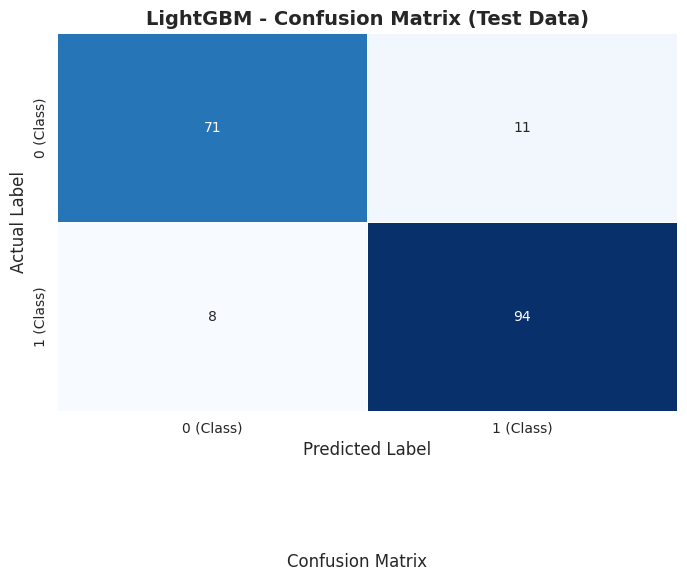

In [52]:
plot_confusion_matrix_heart(trained_models["LightGBM"], X_test_scaled, y_test, "LightGBM")

Confusion Matrix – LightGBM (Test Data)
The confusion matrix above provides a breakdown of the model’s classification performance on the test set. It summarizes the number of correct and incorrect predictions made by the LightGBM classifier:

True Positives (TP): 94
→ Patients correctly predicted to have heart disease.

True Negatives (TN): 71
→ Patients correctly predicted to not have heart disease.

False Positives (FP): 11
→ Patients incorrectly predicted to have heart disease when they do not.

False Negatives (FN): 8
→ Patients with heart disease incorrectly predicted as healthy.

Key Takeaways:
The model performs very well in identifying true cases of heart disease, with a low false negative rate, which is crucial in medical prediction scenarios.

There are a few false positives, which may be acceptable in favor of reducing missed diagnoses.

The high TP and TN values indicate strong overall accuracy and recall, aligning with the model’s previously observed metrics.

This matrix validates that the LightGBM model is not only accurate but also balanced in handling both positive and negative classes effectively.

# Pickling our model to use in our heart diseases streamlit app

In [53]:
with open('LightGBM.pkl', 'wb') as f:
    pickle.dump(LightGBM, f)

print("Trained model saved successfully!")

Trained model saved successfully!


In [54]:
with open('StandardScalar.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("StandardScalar Saved!")

StandardScalar Saved!


# SHAP

In [57]:
with open('LightGBM.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [58]:
explainer = shap.TreeExplainer(best_model)

In [59]:
shap_values = explainer.shap_values(X_test_scaled)

🔹 SHAP Summary Plot Interpretation
The SHAP summary plot displays the impact of each feature on the model's predictions across the entire test dataset. Each point represents an individual prediction, with:

Color indicating the actual feature value (🔴 high, 🔵 low)

Position on the x-axis indicating the impact on the model output (i.e., how much the feature pushes the prediction towards heart disease or not)

Key takeaways from the plot:

ST_Slope_Up and Cholesterol_Age_Ratio are the most influential features in the model.

For ST_Slope_Up, high values (red) tend to reduce the model’s prediction of heart disease, while low values (blue) tend to increase it.

Interestingly, for Cholesterol_Age_Ratio, low values (blue) contribute positively to heart disease prediction. This suggests the model has learned that a lower cholesterol relative to age is associated with a higher risk, possibly due to patterns in the training data.

Features like ExerciseAngina, Sex, and Oldpeak also show strong directional effects on prediction probability.

This plot provides transparency into the direction and magnitude of feature contributions across all predictions.

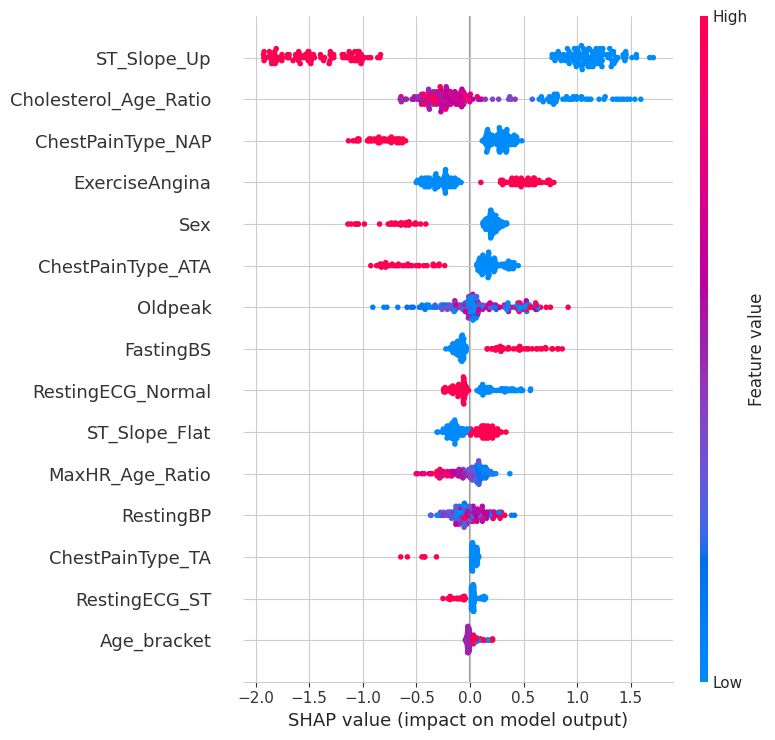

In [60]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=final_feature_names)

SHAP Waterfall Plot Interpretation (Single Prediction)
The SHAP waterfall plot illustrates the step-by-step contribution of each feature toward a specific prediction for an individual patient. This makes it easy to see how the model arrived at its final decision.

The plot starts from the expected value (mean model prediction across all data), shown as E[f(x)] = -0.083.

Each bar (arrow) shows how much a feature adds or subtracts from the prediction.

🔴 Red bars push the prediction higher, increasing the likelihood of heart disease.

🔵 Blue bars pull the prediction lower, reducing the likelihood.

In this example:

Features increasing risk (positive SHAP values):

ExerciseAngina, Sex, and ChestPainType_NAP contributed positively toward predicting heart disease.

Features decreasing risk (negative SHAP values):

ST_Slope_Up, Cholesterol_Age_Ratio, and FastingBS decreased the predicted probability.

The final predicted output is shown as f(x) = 2.963, meaning the model predicted a strong likelihood of heart disease for this patient.

This type of visualization is highly useful in healthcare settings to justify and explain model predictions for individual patients.

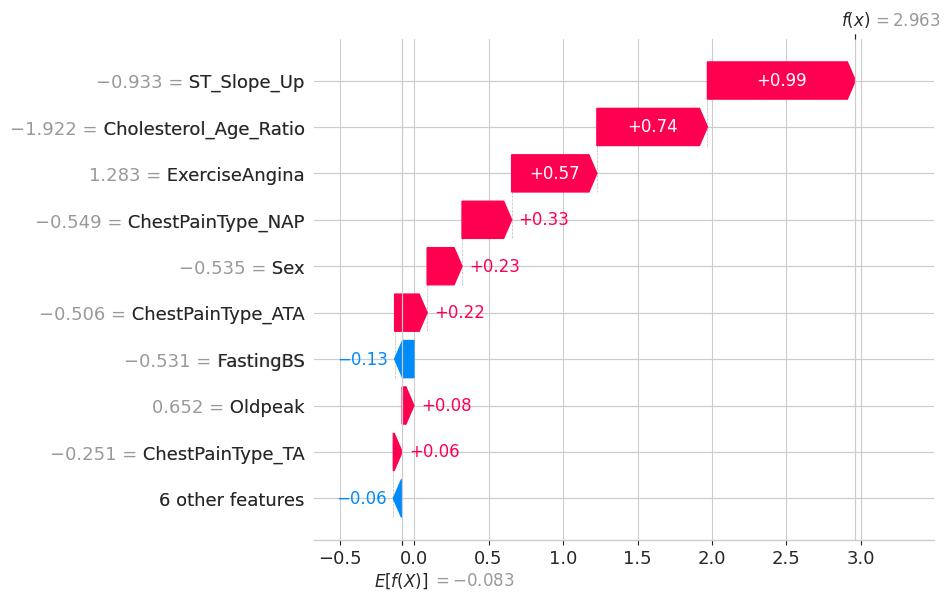

In [74]:
plt.figure(figsize=(16, 8))
shap.plots.waterfall(shap.Explanation(values=shap_values[0],
                                      base_values=explainer.expected_value,
                                      data=X_test_df.iloc[0],
                                      feature_names=final_feature_names))

plt.savefig("shap_force_wide.png", bbox_inches='tight')
plt.close()
plt.show()

# Conclusion

This project demonstrated how machine learning can be applied to predict heart disease using structured medical data. LightGBM outperformed other models and was deployed via Streamlit for interactive use.

### 🔮 Potential Next Steps:
- Use a larger, more diverse dataset for generalization
- Introduce deep learning models like MLPs or LSTMs for time-based patient data
- Incorporate lifestyle factors, medical history, and wearable device data

This was a great learning experience, and I welcome any feedback or suggestions!
